In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [298]:
train = pd.read_csv('train_qWM28Yl.csv')
test = pd.read_csv('test_zo1G9sv.csv')
sub = pd.read_csv('sample_submission_KvRh9Sx.csv')

In [299]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [300]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [301]:
sub.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


In [302]:
## checking the shape of the data
print(train.shape)
print(test.shape)
print(sub.shape)

(58592, 44)
(39063, 43)
(39063, 2)


In [303]:
## check missing value
print(train.isnull().sum().any())
print(test.isnull().sum().any())

False
False


There is no missing value in the dataset.

In [304]:
train.info() ## checking the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [305]:
## value counts of the categorical features
for col in train.select_dtypes(include='object').columns[1:]:
    print(train[col].value_counts())

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113

In [306]:
train['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [307]:
is_column = train.columns[train.columns.str.startswith('is')][:-1]
max_column = train.columns[train.columns.str.startswith('max')]
float_column = train.select_dtypes(include='float64').columns
int_column = train.select_dtypes(include='int64').columns

In [308]:
test_id = test['policy_id']
train.drop('policy_id', axis=1, inplace=True)
test.drop('policy_id', axis=1, inplace=True)

### Features Transformations 

In [309]:
def convert_torque(df):
    x1 = df.apply(lambda x:x.split('@')[0]).str.replace(r'Nm', '').astype(float)
    x2 = df.apply(lambda x:x.split('@')[1]).str.replace(r'rpm', '').astype(float)
    return x1 * (x2/9550)


def convert_power(df):
    x1 = df.apply(lambda x:x.split('@')[0]).str.replace(r'bhp', '').astype(float)
    x2 = df.apply(lambda x:x.split('@')[1]).str.replace(r'rpm', '').astype(float)
    return x1 * (x2/5252)

In [310]:
is_column_group = {'No':0, 'Yes':1}

In [311]:
## convert the yes and no using ordinal encoding
for column in is_column:
    train[column] = train[column].map(is_column_group)
    test[column] = test[column].map(is_column_group)

In [312]:
### convert max torque
train['max_torque'] = convert_torque(train['max_torque'])
test['max_torque'] = convert_torque(test['max_torque'])

### convert power

train['max_power'] = convert_power(train['max_power'])
test['max_power'] = convert_power(test['max_power'])

In [313]:
## remove C and M
train['area_cluster'] = train['area_cluster'].apply(lambda x:x.split('C')[1]).astype(int)
test['area_cluster'] = test['area_cluster'].apply(lambda x:x.split('C')[1]).astype(int)

train['model'] = train['model'].apply(lambda x:x.split('M')[1]).astype(int)
test['model'] = test['model'].apply(lambda x:x.split('M')[1]).astype(int)

In [314]:
train['rear_brakes_type'] = train['rear_brakes_type'].map({'Disc':1, 'Drum':0})
test['rear_brakes_type'] = test['rear_brakes_type'].map({'Disc':1, 'Drum':0})

In [315]:
lb = LabelEncoder()
cat_col = train.select_dtypes(include='object').columns

In [316]:
### label encoding other categorical features 
for col in cat_col:
    train[col] = lb.fit_transform(train[col])
    test[col] = lb.fit_transform(test[col])

### Feature selection

In [317]:
train = train.drop(is_column, axis=1)
test = test.drop(is_column, axis=1)

### FE

In [318]:
train['age_of_policyholder'] = train['age_of_policyholder'] * 100
test['age_of_policyholder'] = test['age_of_policyholder'] * 100

### Machine learning model

In [319]:
X = train.drop('is_claim', axis=1)
y = train['is_claim']

In [362]:
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model= CatBoostClassifier(eval_metric='F1', scale_pos_weight=10, max_bin=300)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    errcb.append(f1_score(y_test,preds))
    p = model.predict(test)
    y_pred_totcb.append(p)

Learning rate set to 0.081965
0:	learn: 0.2525917	test: 0.2525917	test1: 0.2543620	best: 0.2543620 (0)	total: 7.48ms	remaining: 7.48s
100:	learn: 0.4976188	test: 0.4976188	test1: 0.4109589	best: 0.4138271 (41)	total: 708ms	remaining: 6.3s
200:	learn: 0.5501974	test: 0.5501974	test1: 0.4073891	best: 0.4158545 (123)	total: 1.41s	remaining: 5.62s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4158544509
bestIteration = 123

Shrink model to first 124 iterations.
err:  0.15715162676488642
Learning rate set to 0.081965
0:	learn: 0.2689102	test: 0.2689102	test1: 0.2704656	best: 0.2704656 (0)	total: 6.84ms	remaining: 6.83s
100:	learn: 0.4762480	test: 0.4762480	test1: 0.4446624	best: 0.4472374 (94)	total: 727ms	remaining: 6.47s
200:	learn: 0.5484138	test: 0.5484138	test1: 0.4268996	best: 0.4483574 (103)	total: 1.46s	remaining: 5.82s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4483573816
bestIteration = 103

Shrink model to first 104 iterations.
err

In [363]:
print(np.mean(errcb))
print(np.std(errcb))

0.1726799957515061
0.008737287098996923


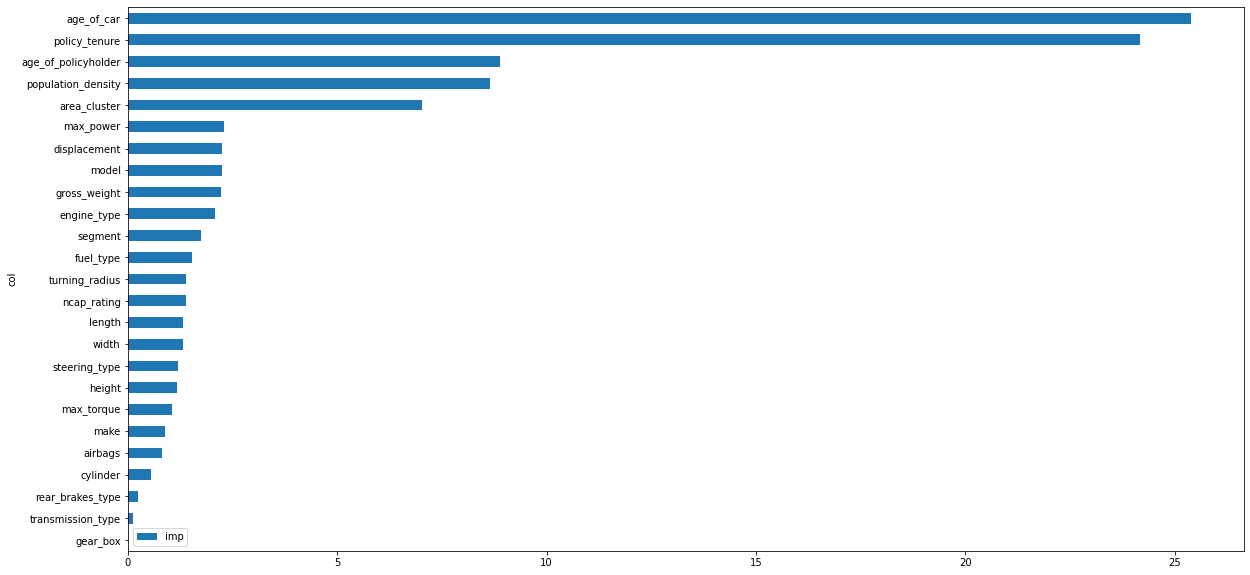

In [340]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))   

In [341]:
pd.DataFrame(np.mean(y_pred_totcb, 0), columns=['is_claim']).value_counts()

is_claim
0.0         27607
1.0          4700
0.1          1263
0.9          1076
0.8           784
0.2           779
0.7           653
0.3           613
0.5           549
0.4           533
0.6           506
dtype: int64

In [352]:
d = {"policy_id": test_id, 'is_claim': (np.mean(y_pred_totcb, 0))}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["policy_id", 'is_claim']]

In [353]:
def threshold(x):
    if x < 0.4: #<0.4
        return 0
    else:
        return 1

In [354]:
test_predictions['is_claim'] = test_predictions['is_claim'].apply(threshold)

In [355]:
test_predictions['is_claim'].value_counts()

0    29649
1     9414
Name: is_claim, dtype: int64

In [356]:
test_predictions.to_csv('base40.csv', index=False)

### mode

In [874]:
pred = pd.DataFrame(y_pred_totcb).T

In [875]:
np.array(pred.mode(axis=1)[0])

array([1, 0, 0, ..., 0, 1, 0])

In [876]:
d = {"policy_id": test_id, 'is_claim': np.array(pred.mode(axis=1)[0])}
test_pred = pd.DataFrame(data=d)
test_pred = test_pred[["policy_id", 'is_claim']]

In [877]:
test_pred['is_claim'].value_counts()

0    31186
1     7877
Name: is_claim, dtype: int64

In [878]:
test_pred.to_csv('cb_mode1.csv', index=False)